In [68]:
import eurostat
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

In [69]:
settings = {'figure.figsize':(14,4),
            'figure.dpi':144,
            'figure.facecolor':'w',
            'axes.spines.top':False,
            'axes.spines.bottom':False,
            'axes.spines.left':False,
            'axes.spines.right':False,
            'axes.grid':True,
            'grid.linestyle':'--',
            'grid.linewidth':0.5, 
            'figure.constrained_layout.use':True}
plt.rcParams.update(settings)

%config InlineBackend.figure_format = "retina"

In [70]:
#### WHERE TO SAVE DATA'
output = "../output/"
figures = "../figures/"	

In [71]:
start_date = "1983-01-01"

data = eurostat.get_data_df('une_rt_m')
#data.to_csv("tmp.csv")

data = data[data['freq'] == 'M']
data = data[data['s_adj'] == 'NSA']
data = data[data['age'] == 'TOTAL']
data = data[data['unit'] == 'PC_ACT']
data = data[data['sex'].isin(['M', 'F'])]
data.head()

,freq,s_adj,age,unit,sex,geo\TIME_PERIOD,1983-01,1983-02,1983-03,1983-04,...,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10
0,M,NSA,TOTAL,PC_ACT,F,AT,NaN,NaN,NaN,NaN,...,4.6,4.5,5.0,4.8,4.2,4.6,4.2,4.7,5.2,NaN
1,M,NSA,TOTAL,PC_ACT,F,BA,NaN,NaN,NaN,NaN,...,17.2,17.1,17.0,16.2,16.0,16.1,16.0,16.1,NaN,NaN
2,M,NSA,TOTAL,PC_ACT,F,BE,NaN,NaN,NaN,NaN,...,5.0,4.9,4.9,5.0,5.0,4.9,5.4,5.4,5.3,NaN
3,M,NSA,TOTAL,PC_ACT,F,BG,NaN,NaN,NaN,NaN,...,5.0,5.1,4.9,4.5,4.0,3.7,3.4,3.1,3.0,NaN
4,M,NSA,TOTAL,PC_ACT,F,CH,NaN,NaN,NaN,NaN,...,4.3,4.4,4.4,4.3,4.2,4.2,NaN,NaN,NaN,NaN


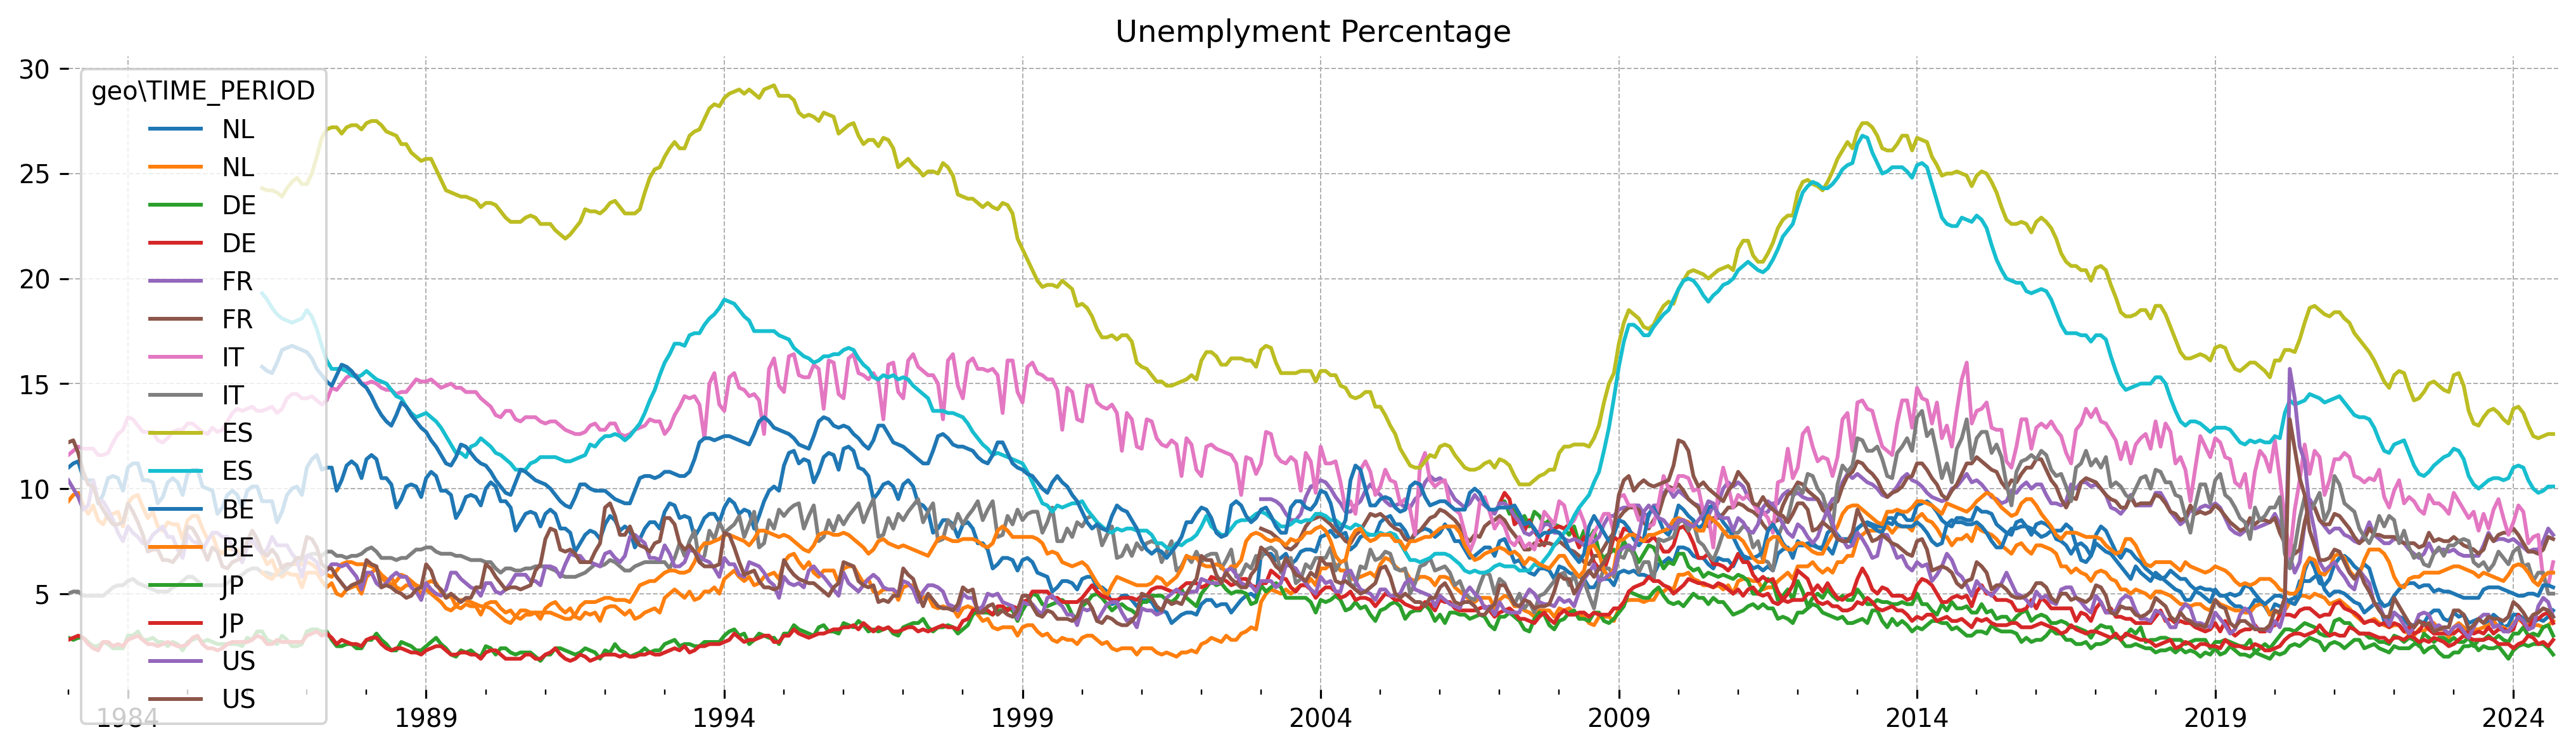

In [72]:

dt2 = data.iloc[:, 5:]
dt2 = dt2.T
# after transpose, first row is the column names
dt2.columns = dt2.iloc[0,:]
# remove first row
data1 = dt2.iloc[1:]

data1.index = pd.date_range(start = start_date,  periods = data1.shape[0], freq = "MS")
data1 = data1.loc[:, ['NL','DE','FR','IT','ES','BE','JP','US']]
data1.plot(title='Unemplyment Percentage');
data1.to_csv(output + "unemployment_mo.csv")


### European GDP

In [73]:
start_date = '01/01/1975'

data = eurostat.get_data_df('namq_10_gdp')
data = data[data["unit"] == "CLV10_MEUR"]
data = data[data["s_adj"] == "NSA"]
data = data[data['na_item'] == 'B1G']

In [74]:
##################
# select needed items for analysis
##################

dt2 = data.iloc[:, 4:]
dt2 = dt2.T
# after transpose, first row is the column names
dt2.columns = dt2.iloc[0,:]
# remove first row
data = dt2.iloc[1:]

data.index = pd.date_range(start = start_date,  periods = data.shape[0], freq = "QS")
data = data.loc[:, ['NL','DE','FR','IT','ES','BE','JP','US']]

data.to_csv(output + "europe_gdp_qt.csv")
data.plot()

KeyError: "['JP', 'US'] not in index"